In [2]:
import configparser
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import PatchCollection
from matplotlib.patches import Ellipse, Rectangle, Circle, Wedge

## Experiments with Hard Circle Boundary

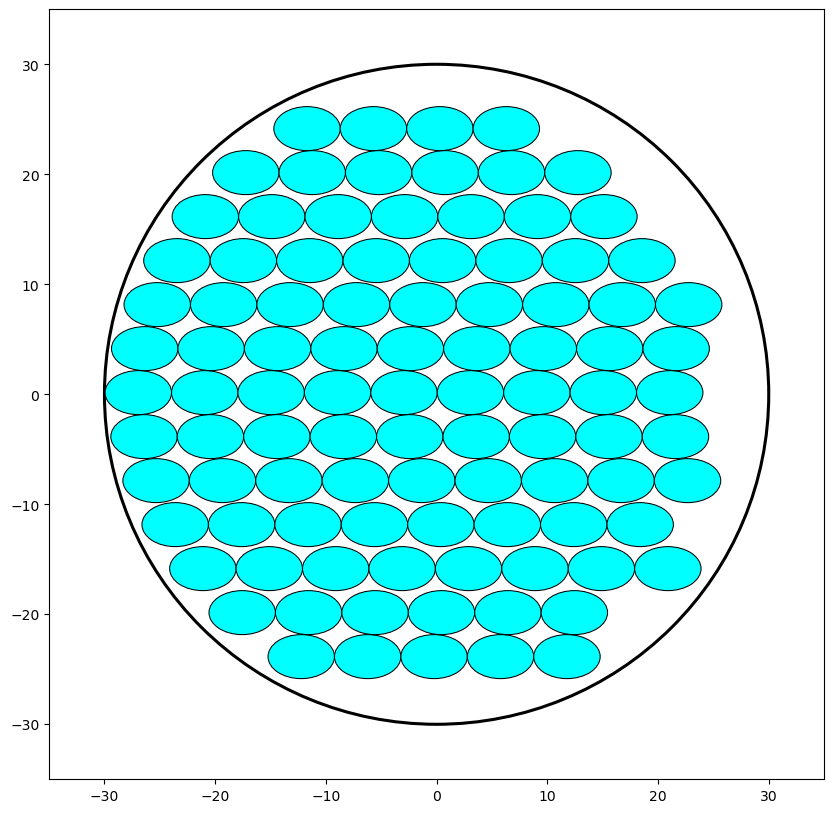

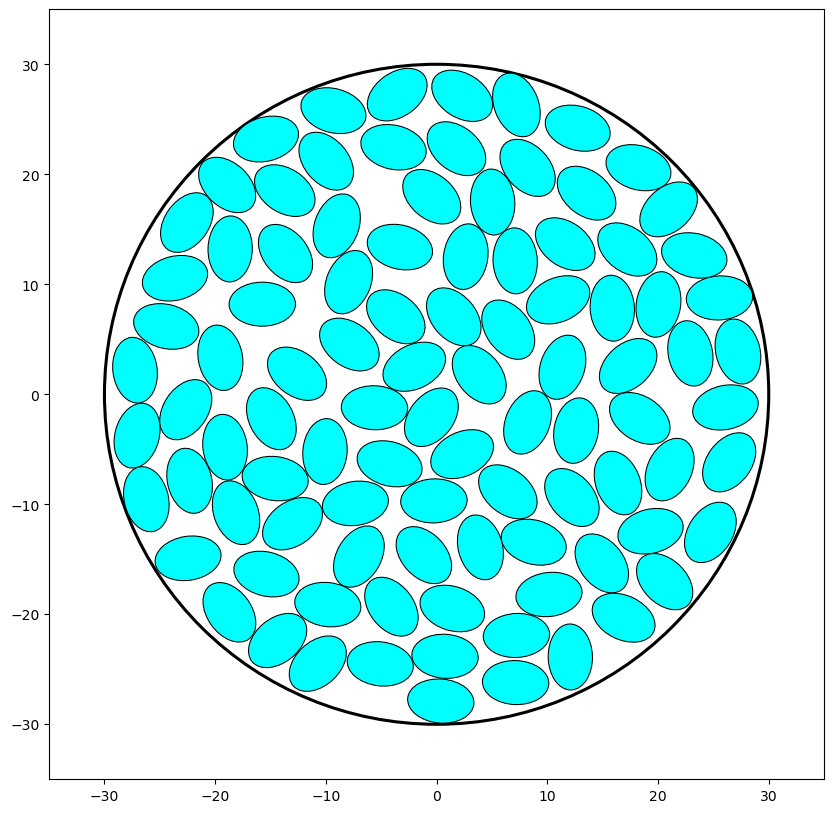

In [20]:
initial_positions_file = "build/circleSimOut/initialPositions_circle.txt"
final_positions_file = "build/circleSimOut/finalPositions_circle.txt"

init_arr = np.genfromtxt(initial_positions_file, dtype=float, delimiter=",")
final_arr = np.genfromtxt(final_positions_file, dtype=float, delimiter=",")

config = configparser.ConfigParser()
config.read("build/circleSimOut/circleSimNotes.txt")
a = float(config["Parameters"]["Semi-major axis"])
b = float(config["Parameters"]["Semi-minor axis"])
radius = float(config["Parameters"]["Circle Radius"])

for arr in [init_arr, final_arr]:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    outer_circle = plt.Circle((0, 0), radius, color="black", fill=False, linewidth=2.2)
    ax.add_patch(outer_circle)

    for i in range(0, arr.shape[0]):
        pos = arr[i, :]
        ellipse_angle = (180 / np.pi) * (pos[-1] % np.pi)
        particle = Ellipse(xy=pos[:-1], angle=ellipse_angle,
                        width=2 * a, height=2 * b,
                        linewidth=0.75, ec='black', fill=True, fc="cyan")
        ax.add_patch(particle)

    scale = radius
    ax.set_xlim(-scale-5, scale+5)
    ax.set_ylim(-scale-5, scale+5)

plt.show()

## Experiments with Hard Box Boundary

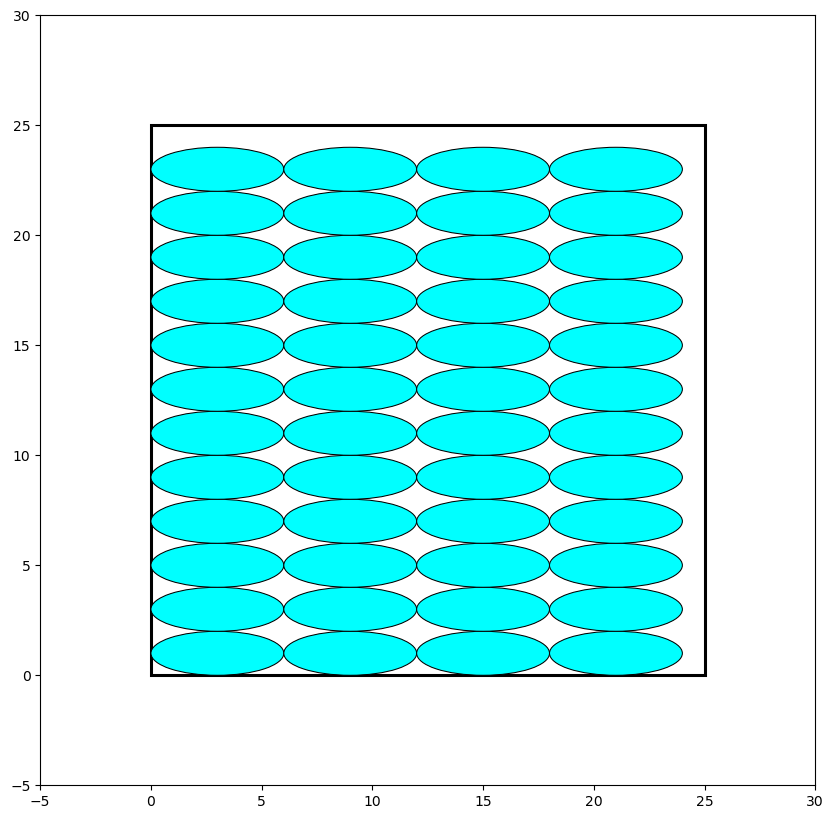

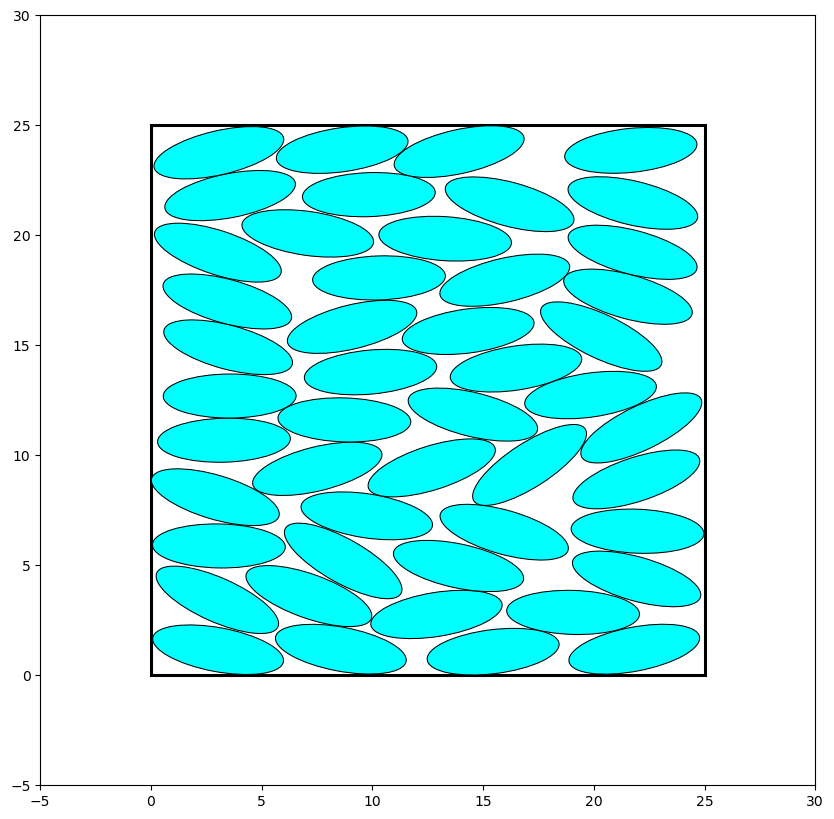

In [26]:
initial_positions_file = "build/boxHardSimOut/initialPositions_box.txt"
final_positions_file = "build/boxHardSimOut/finalPositions_box.txt"

init_arr = np.genfromtxt(initial_positions_file, skip_header=1, dtype=float, delimiter=",")
final_arr = np.genfromtxt(final_positions_file, skip_header=1, dtype=float, delimiter=",")

# read the sim notes file to get simulation parameters
config = configparser.ConfigParser()
config.read("build/boxHardSimOut/boxSimNotes.txt")
a = float(config["Parameters"]["Semi-major axis"])
b = float(config["Parameters"]["Semi-minor axis"])
box_height = float(config["Parameters"]["Box height"])
box_width = float(config["Parameters"]["Box width"])

for arr in [init_arr, final_arr]:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    box = plt.Rectangle((0,0), box_width, box_height, color="black", fill=False, linewidth=2.2)
    ax.add_patch(box)

    for i in range(0, arr.shape[0]):
        pos = arr[i, :]
        ellipse_angle = (180 / np.pi) * (pos[-1] % np.pi)
        particle = Ellipse(xy=pos[:-1], angle=ellipse_angle,
                        width=2 * a, height=2 * b,
                        linewidth=0.75, ec='black', fc="cyan", fill=True)
        ax.add_patch(particle)

        scale = box_height
        ax.set_xlim(-5, box_width+5)
        ax.set_ylim(-5, box_height+5)

    plt.show()


## Experiments with Periodic Box Boundary

C:\Users\yusiy\AppData\Local\Temp\ipykernel_25560\2924383100.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  box = plt.Rectangle((mX * box_width, mY * box_height), box_width, box_height, color="black",


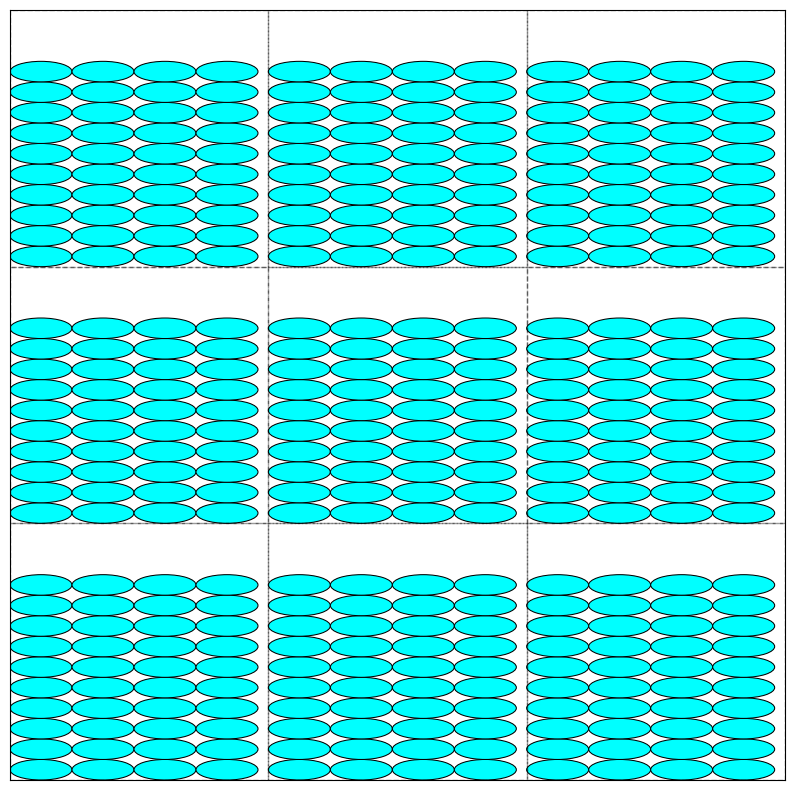

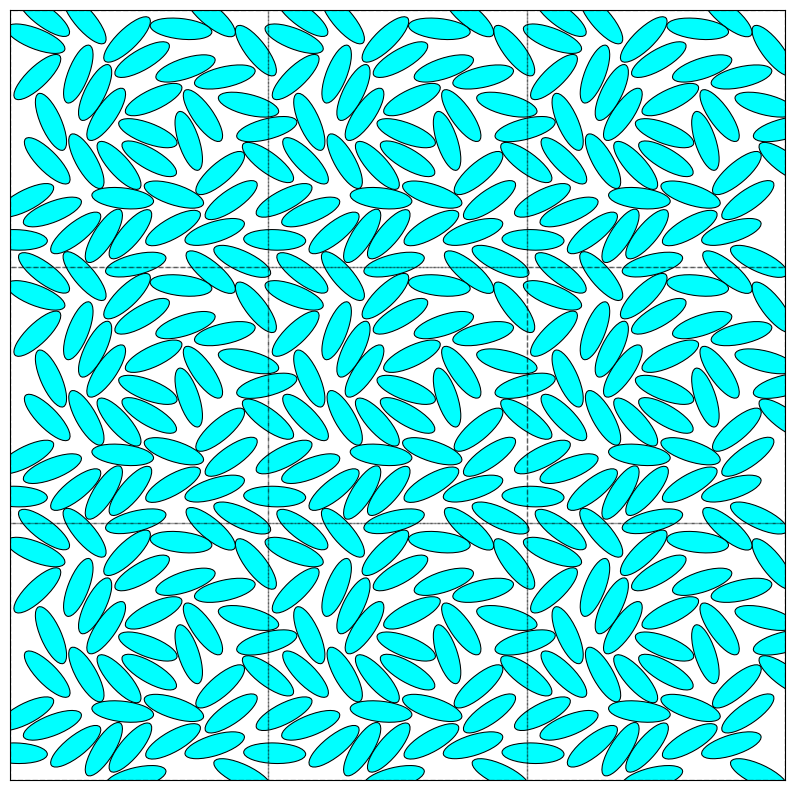

In [5]:
initial_positions_file = "build/boxPeriodicSimOut/initialPositions_box.txt"
final_positions_file = "build/boxPeriodicSimOut/finalPositions_box.txt"

init_arr = np.genfromtxt(initial_positions_file, skip_header=1, dtype=float, delimiter=",")
final_arr = np.genfromtxt(final_positions_file, skip_header=1, dtype=float, delimiter=",")

# read the sim notes file to get simulation parameters
config = configparser.ConfigParser()
config.read("build/boxPeriodicSimOut/boxSimNotes.txt")
a = float(config["Parameters"]["Semi-major axis"])
b = float(config["Parameters"]["Semi-minor axis"])
box_height = float(config["Parameters"]["Box height"])
box_width = float(config["Parameters"]["Box width"])

translates = [(-1, +1), (-1, +0), (-1, -1),
              (+0, +1), (+0, +0), (+0, -1),
              (+1, +1), (+1, +0), (+1, -1)]

for arr in [init_arr, final_arr]:
    fig, ax = plt.subplots()
    plt.xticks([])
    plt.yticks([])
    fig.set_size_inches(10, 10)
    for mX, mY in translates:
        box = plt.Rectangle((mX * box_width, mY * box_height), box_width, box_height, color="black", 
                             fill=False, facecolor='none', alpha=0, linestyle='--', zorder=2)
        ax.add_patch(box)
        for i in range(0, arr.shape[0]):
            pos = arr[i, :]
            ellipse_angle = (180 / np.pi) * (pos[-1] % np.pi)
            particle = Ellipse(xy=pos[:-1] + np.array([mX * box_width, mY * box_height]), angle=ellipse_angle,
                            width=2 * a, height=2 * b,
                            linewidth=0.75, ec='black', fc="cyan", fill=True, zorder=1)
            ax.add_patch(particle)

            scale = box_height
            ax.set_xlim(-scale, scale+scale)
            ax.set_ylim(-scale, scale+scale)

    plt.show()

## Experiments with Python Code

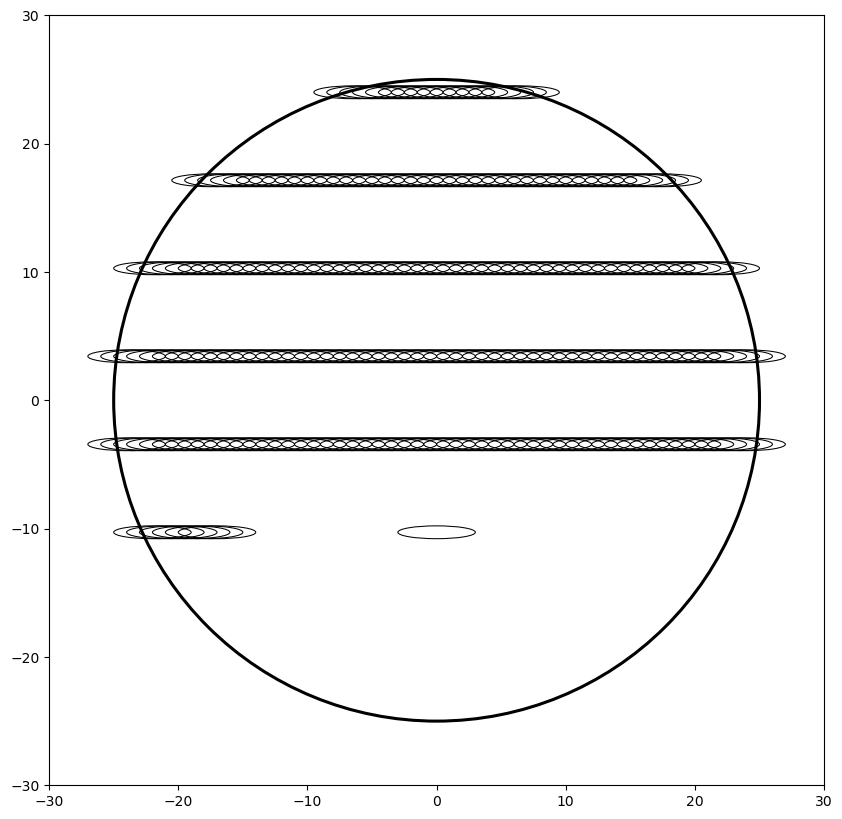

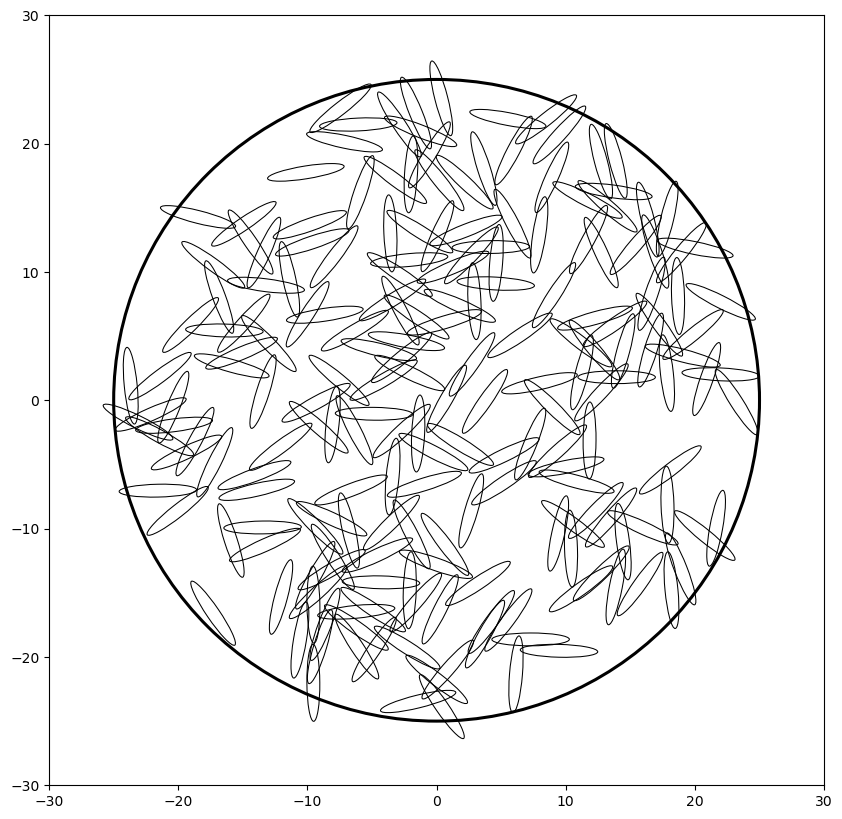

In [5]:
positions_file = "finalPositions.txt"

init_pos_arr = np.genfromtxt("C:\\Users\\yusiy\\GitHub\\LiquidCrystals\\simulation\\circle_R25_n_200_k_0.16666666666666666_HardBC\\instanceRun1\\PosArray.csv", dtype=float, delimiter=",")
final_pos_arr = np.genfromtxt("C:\\Users\\yusiy\\GitHub\\LiquidCrystals\simulation\circle_R25_n_200_k_0.16666666666666666_HardBC\\instanceRun1\\FinalPosArray.csv", dtype=float, delimiter=",")

a = 3
b = 0.5

for arr in [init_pos_arr, final_pos_arr]:

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    outer_circle = plt.Circle((0, 0), 25, color="black", fill=False, linewidth=2.2)
    ax.add_patch(outer_circle)

    for i in range(0, arr.shape[0]):
        pos = arr[i, :]
        ellipse_angle = (180 / np.pi) * (pos[-1] % np.pi)
        particle = Ellipse(xy=pos[:-1], angle=ellipse_angle,
                        width=2 * a, height=2 * b,
                        linewidth=0.75, color='black', fill=False)
        ax.add_patch(particle)

    scale = 25
    ax.set_xlim(-scale - 5, scale + 5)
    ax.set_ylim(-scale - 5, scale + 5)

    plt.show()